In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")   


In [326]:
df=pd.read_csv("Parkinsson disease.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [327]:
df.shape

(195, 24)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [329]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [330]:
print(df.drop('name', axis=1).skew())

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64


status
1    147
0     48
Name: count, dtype: int64


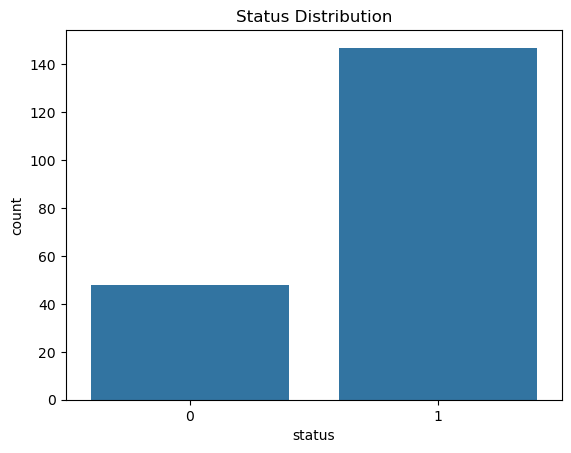

In [331]:
print(df['status'].value_counts())
sns.countplot(x='status', data=df)
plt.title('Status Distribution')
plt.show()

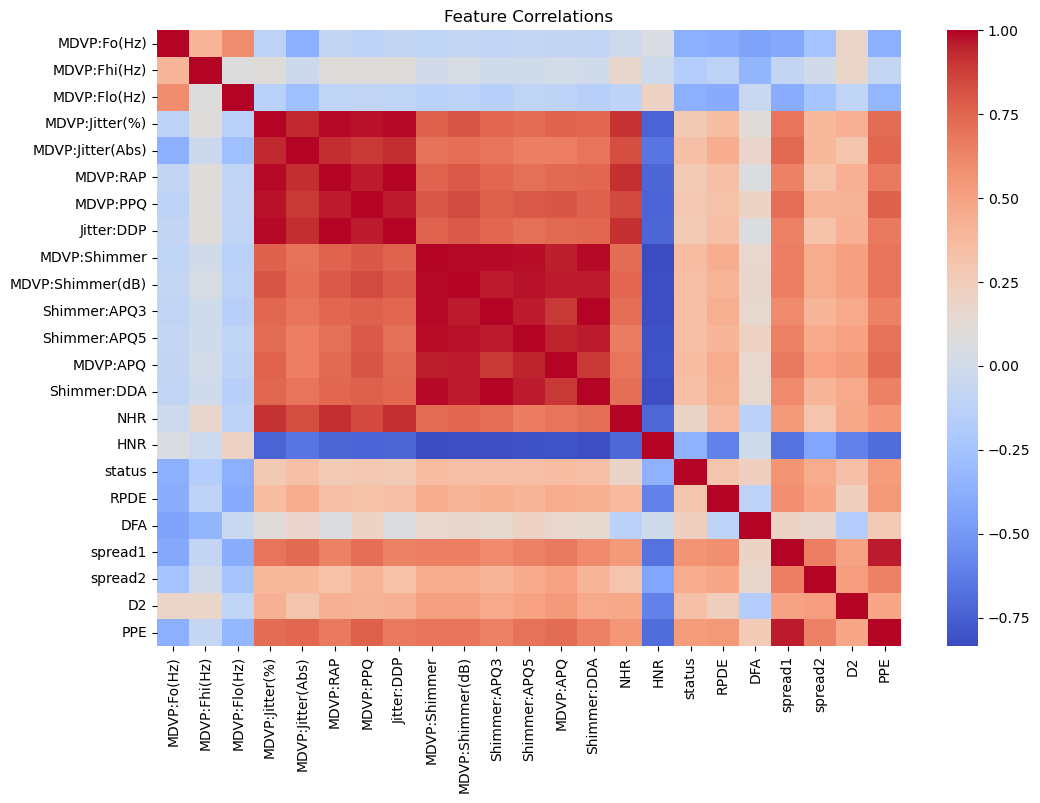

In [332]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('name', axis=1).corr(), cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [333]:
df = df.drop('name', axis=1)

In [334]:
scaler = StandardScaler()
X = df.drop('status', axis=1)
y = df['status']
X_scaled = scaler.fit_transform(X)


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [337]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('Ridge Classifier Accuracy:', accuracy_score(y_test, y_pred_ridge))

Ridge Classifier Accuracy: 0.9230769230769231


In [338]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print('Lasso (L1 Logistic Regression) Accuracy:', accuracy_score(y_test, y_pred_lasso))

Lasso (L1 Logistic Regression) Accuracy: 0.8974358974358975


In [339]:
logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred_logi = logi.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logi))

Logistic Regression Accuracy: 0.8974358974358975


In [340]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9230769230769231


In [341]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9487179487179487


In [342]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('Naïve Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.717948717948718


In [343]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9487179487179487


In [344]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.8461538461538461


In [345]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9487179487179487


In [346]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8974358974358975


In [347]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9487179487179487


In [348]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = np.round(linreg.predict(X_test))  
print('Linear Regression Accuracy:', accuracy_score(y_test, y_pred_linreg))

Linear Regression Accuracy: 0.8717948717948718


In [349]:
print('Logistic Regression Report:\n', classification_report(y_test, y_pred_logi))
print('Ridge Report:\n', classification_report(y_test, y_pred_ridge))
print('Lasso Report:\n', classification_report(y_test, y_pred_lasso))
print('Naïve Bayes Report:\n', classification_report(y_test, y_pred_nb))
print('XGBoost Report:\n', classification_report(y_test, y_pred_xgb))
print('SVM Report:\n', classification_report(y_test, y_pred_svm))
print('Random Forest Report:\n', classification_report(y_test, y_pred_rf))
print('Decision Tree Report:\n', classification_report(y_test, y_pred_dt))
print('KNN Report:\n', classification_report(y_test, y_pred_knn))
print('Gradient Boosting Report:\n', classification_report(y_test, y_pred_gb))
print('AdaBoost Report:\n', classification_report(y_test, y_pred_ada))
print('Linear Regression Report:\n', classification_report(y_test, y_pred_linreg))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Ridge Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39

Lasso Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg   

In [350]:
import pickle

# Save the best model, scaler, and columns after training
with open('best_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)  # replace 'xgb' by your best model variable

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)
